In [1]:
from sklearn.decomposition import PCA 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler 

2. Wczytaj zestaw danych, na przykład zestaw danych Breast Cancer dostępny w bibliotece scikitlearn. Wykonaj redukcję wymiarowości danych za pomocą algorytmu PCA. Przedstaw wyniki redukcji wymiarowości na wykresie, gdzie punkty danych są przedstawione w nowej przestrzeni o mniejszej liczbie wymiarów. Breast cancer dataset to zestaw danych dotyczący raka piersi zawiera cechy obrazów komórek rakowych pochodzących z biopsji. Zbiór ten zawiera 30 cech opisujących różne właściwości komórek. Jest to przydatny zestaw danych do analizy głównych składowych (PCA) w celu redukcji wymiarowości i wizualizacji danych 

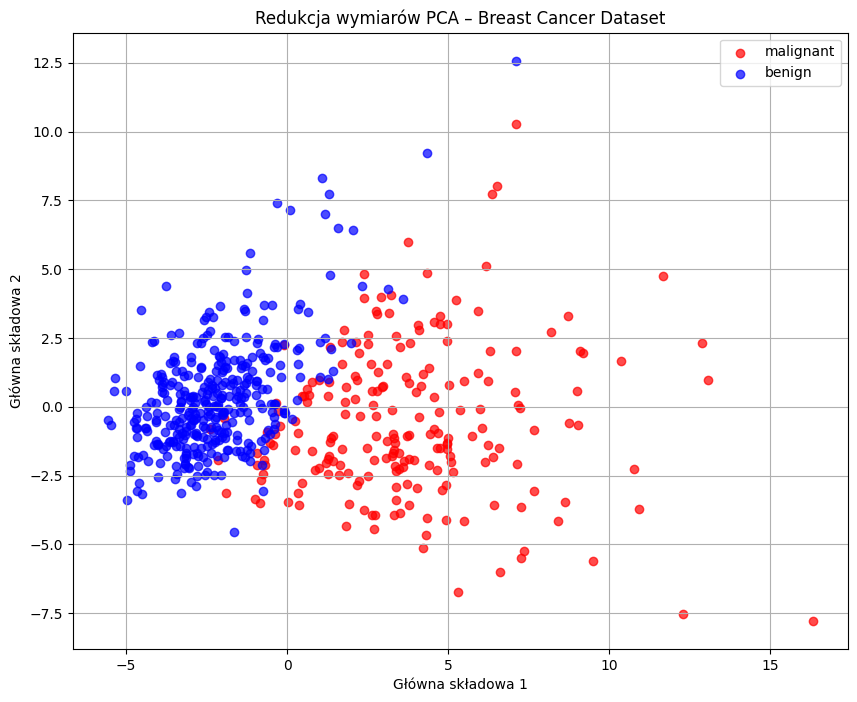

In [6]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled) 
colors = ['red', 'blue']

plt.figure(figsize=(10, 8))
for i in range(len(cancer.target_names)):
    plt.scatter(
    X_pca[Y == i, 0],  # pierwsza główna składowa
    X_pca[Y == i, 1],  # druga główna składowa
    alpha=0.7,
    color=colors[i],
    label=cancer.target_names[i]
)

plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Redukcja wymiarów PCA – Breast Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()


Wnioski:
Oba rodzaje nowotworów piersi zostały ładnie oddzielone, 30 cech niemożliwe do zwizualizowania

3.Wczytaj zestaw danych np. Digits dataset (baza ręcznie pisanych cyfr). Wykonaj redukcję wymiarowości danych za pomocą metody t-SNE. Przedstaw wyniki na wykresie 2D, gdzie każda cyfra będzie miała swoją reprezentację w przestrzeni 2D. Zbiór Digits dataset to zestaw danych zawierających obrazy ręcznie napisanych cyfr od 0 do 9. Każdy obraz ma rozmiar 8x8 pikseli, co daje 64 cechy. Zestaw zawiera 1797 przykładów. Jest to przydatny zestaw danych do zadań redukcji wymiarowości

In [7]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

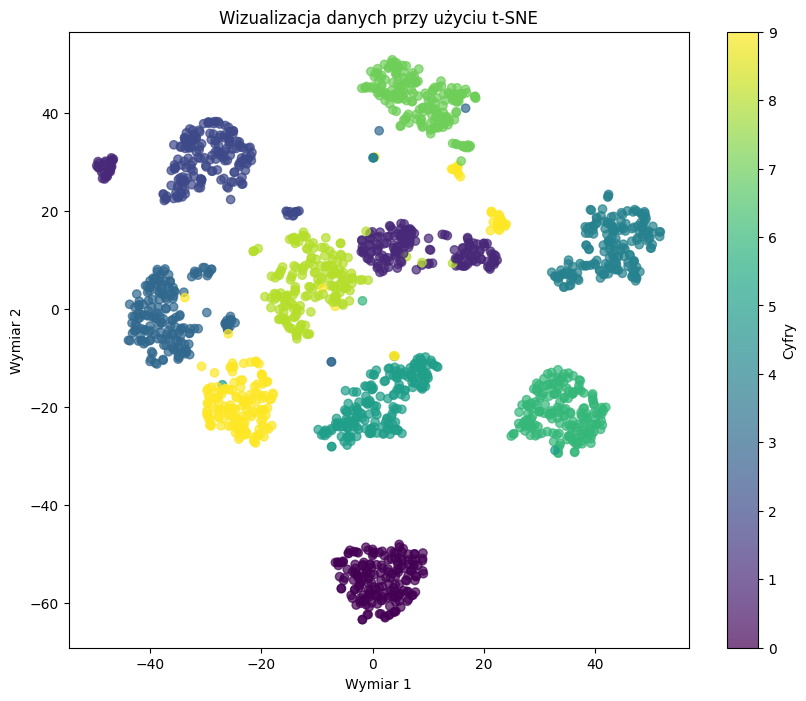

In [14]:
digits = load_digits()

X = digits.data
Y = digits.target

tsne = TSNE(n_components=2) 
X_embedded = tsne.fit_transform(X) 

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.title("Wizualizacja danych przy użyciu t-SNE")
plt.xlabel('Wymiar 1')
plt.ylabel('Wymiar 2')
plt.colorbar(label = 'Cyfry')
plt.show()


Wnioski:

4.Wczytaj zbiór danych o obrazach twarzy, np. zbiór danych Labeled Faces in the Wild (LFW). Wykonaj redukcję wymiarowości danych za pomocą metody NMF. Wybierz kilka cech (składających się na macierz bazową) i wyświetl je w postaci obrazów, aby zobaczyć, jakie cechy zostały wykryte przez algorytm. Zbiór danych LFW z biblioteki sikit-learn zawiera tysiące zdjęć twarzy różnych osób, z etykietami określającymi tożsamość każdej osoby. Może być wykorzystywany do zadań redukcji wymiarowości w celu wizualizacji przestrzeni cech twarzy.

In [16]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt


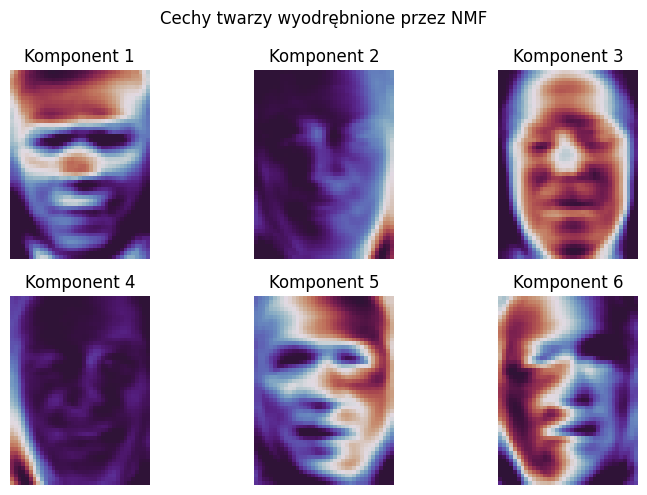

In [44]:

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
n_samples, h, w = lfw_people.images.shape

nmf = NMF(n_components=6, init='nndsvda',max_iter=10000, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_


fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(h, w), cmap='twilight_shifted')
    ax.set_title(f'Komponent {i+1}')
    ax.axis('off')
plt.suptitle('Cechy twarzy wyodrębnione przez NMF')
plt.tight_layout()
plt.show()


Wnioski:
NMF próbuje rozłożyć dane obrazów twarzy na kilka nieujemnych komponentów, które można interpretować jako elementarne cechy twarzy. W przeciwieństwie do metod takich jak PCA, NMF daje częściowe (lokalne) reprezentacje — każdy komponent przypomina fragment twarzy

5.Zastosuj metodę SVD w celu redukcji wymiarowości zbioru danych Wine. Określ optymalną liczbę komponentów do redukcji wymiarowości danych poprzez analizę wariancji wyjaśnianej przez każdy z komponentów. Wybierz liczbę komponentów, która wyjaśnia odpowiednio dużą część wariancji (np. minimum 95%). Przekształć oryginalny zbiór danych do przestrzeni o mniejszej liczbie wymiarów zgodnie z wybraną liczbą komponentów. Zwizualizuj dane w nowej przestrzeni o mniejszej liczbie wymiarów za pomocą wykresu, aby zobaczyć, jak różne odmiany wina rozkładają się w nowej przestrzeni cech. Zbiór danych Wine z biblioteki sikit-learn zawiera wyniki chemicznych analiz trzech różnych odmian win (klasyfikowane jako 1, 2, 3). Każda próbka ma 13 cech opisujących różne składniki chemiczne wina. 

In [41]:
from sklearn.datasets import load_wine
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler


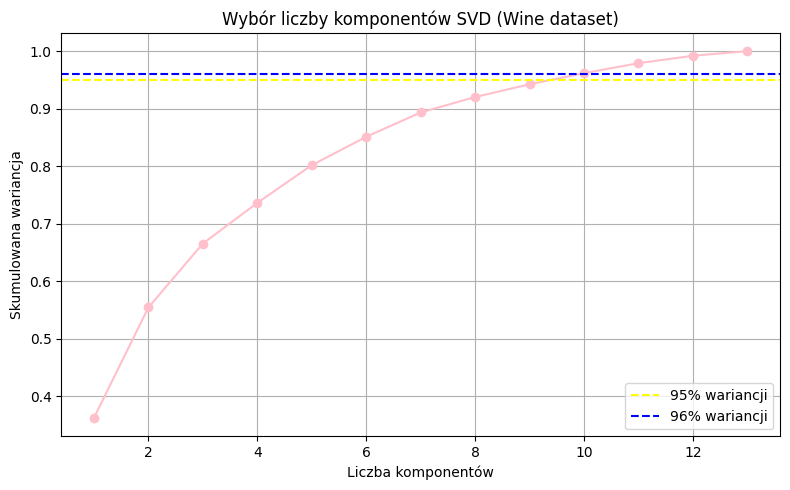

Optymalna liczba komponentów: 9



In [59]:
wine = load_wine()
X = wine.data
Y = wine.target
target_names = wine.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svd = TruncatedSVD(n_components=X.shape[1])
svd.fit(X_scaled)

explained_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', color='pink')
plt.axhline(y=0.95, color='yellow', linestyle='--', label='95% wariancji')
plt.axhline(y=0.96, color='blue', linestyle='--', label='96% wariancji')
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wariancja')
plt.title('Wybór liczby komponentów SVD (Wine dataset)')
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

n_components = np.argmax(explained_variance >= 0.95)
print(f"Optymalna liczba komponentów: {n_components}\n")




wykres pokazuje, jak szybko rośnie suma wyjaśnionej wariancji wraz z liczbą komponentów

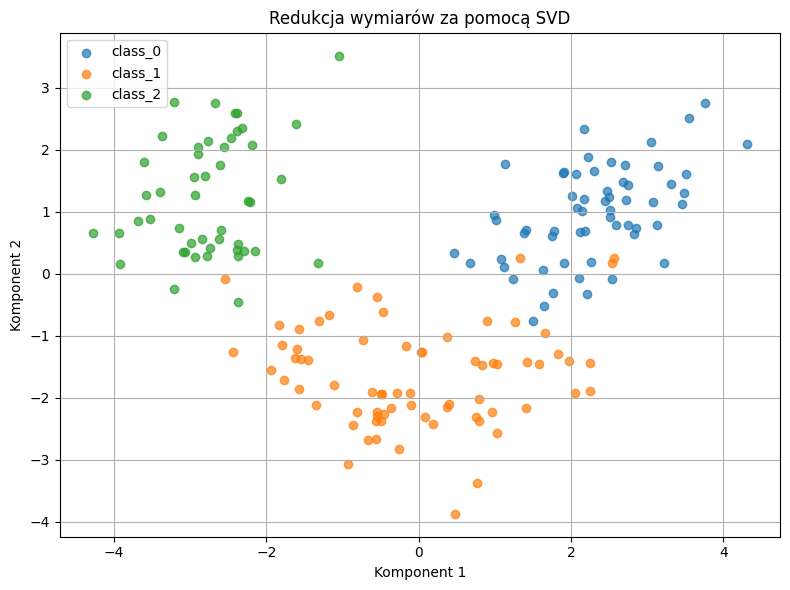

In [60]:

svd_2d = TruncatedSVD(n_components=2)
X_reduced = svd_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_reduced[Y == i, 0], X_reduced[Y == i, 1], label=name, alpha=0.7)
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.title('Redukcja wymiarów za pomocą SVD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Wybieram tylko 2 z tych 9, bo chcesz zobaczyć, jak dane rozdzielają się w przestrzeni, tylko to można pokazać tylko na 2D wykresie.
Podobne do PCA, ale TruncatedSVD może działać również dla rzadkich macierzy

6.Wczytaj zbiór danych "20 Newsgroups" dostępny w bibliotece scikit-learn. Wykonaj przetwarzanie tekstu, aby oczyścić i przekształcić dokumenty na wektory cech, na przykład używając technik takich jak tokenizacja, usuwanie stop words, stemming itp. Zastosuj metodę LDA do zredukowania wymiarowości danych. Przeprowadź analizę wyników, aby zidentyfikować główne tematy lub kategorie w zbiorze danych. Przedstaw wyniki na wykresie, pokazując przyporządkowanie dokumentów do poszczególnych tematów wyodrębnionych za pomocą LDA. 20 newsgroups dataset to zestaw danych zawierający zbiór artykułów z 20 różnych grup dyskusyjnych online, z etykietami kategorii, do których należy każdy artykuł. Może być wykorzystywany do redukcji wymiarowości tekstu. 

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

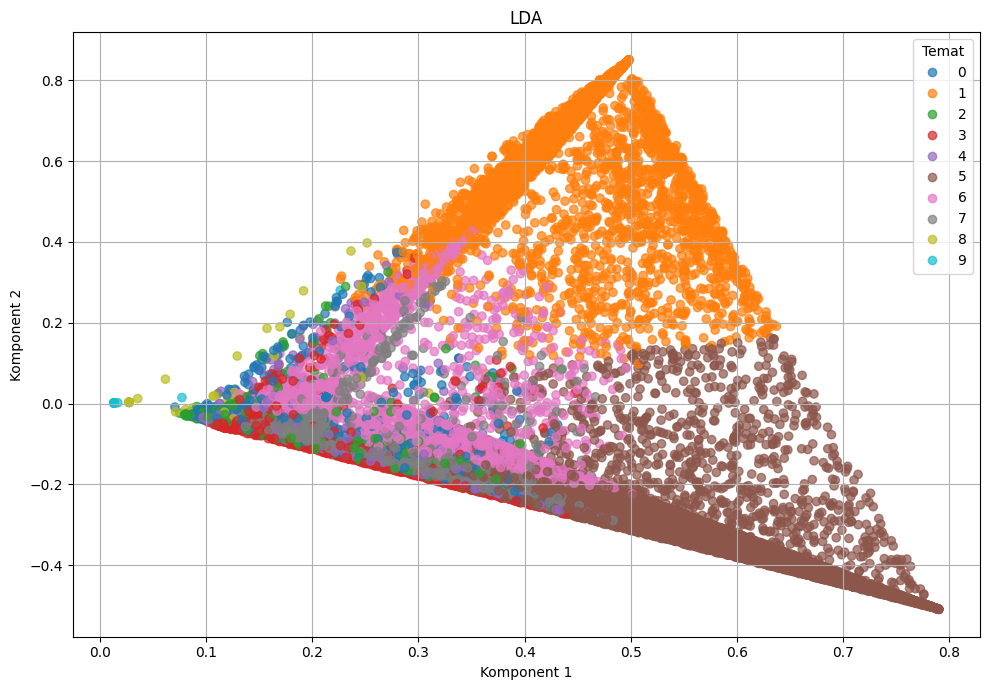

In [10]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

documents = newsgroups.data
target_names = newsgroups.target_names

#przekształcenie dokumentów na wektory cech
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(documents)

# Zastosowanie LDA z 10 tematami
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(X)

'''Redukcja do 2d w celu wizualizacji'''
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(lda_topics)

# Wybór dominującego tematu dla każdego dokumentu
dominant_topic = np.argmax(lda_topics, axis=1)

# Wizualizacja na wykresie 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=dominant_topic, cmap='tab10', alpha=0.7)
plt.title("LDA")
plt.xlabel("Komponent 1")
plt.ylabel("Komponent 2")
plt.grid(True)

# Legenda
plt.legend(*scatter.legend_elements(), title="Temat")
plt.tight_layout()
plt.show()

Zastosowanie LDA na zbiorze 20 Newsgroups pozwala wydzielić 10 ukrytych tematów na podstawie zawartości dokumentów.

Każdy dokument został opisany przez rozkład prawdopodobieństw przynależności do tematów

In [9]:
#wyświetlanie 10 najważniejszych słów dla każdego tematu
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Temat {topic_idx+1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-11:-1]]))
    print()


Temat 1:
space 00 armenian turkish new earth armenians nasa 50 10

Temat 2:
use windows file dos drive image using does like software

Temat 3:
file use health medical number program entry disease research study

Temat 4:
israel jews war people jewish israeli arab did time government

Temat 5:
10 game 25 team 12 11 15 games 20 14

Temat 6:
don just people think like know time right said good

Temat 7:
edu mail com information send use computer list email new

Temat 8:
god people does jesus believe say think don know key

Temat 9:
cx w7 c_ mv ah hz uw t7 ck 17

Temat 10:
ax max g9v b8f a86 pl 145 1d9 0t 1t

